In [1]:
import pandas as pd
import numpy as np
import datetime
data = pd.read_excel(r"C:\Users\DELL\Downloads\DAC\Python\Project Final\Dataset.xlsx",sheet_name="Orders")

In [2]:
print(data.head(10))

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0     646  CA-2017-126221 2017-12-30 2018-01-05  Standard Class    CC-12430   
1     907  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
2     908  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
3     909  CA-2017-143259 2017-12-30 2018-01-03  Standard Class    PO-18865   
4    1297  CA-2017-115427 2017-12-30 2018-01-03  Standard Class    EB-13975   
5    1298  CA-2017-115427 2017-12-30 2018-01-03  Standard Class    EB-13975   
6    5092  CA-2017-156720 2017-12-30 2018-01-03  Standard Class    JM-15580   
7    1878  CA-2017-118885 2017-12-29 2018-01-02  Standard Class    JG-15160   
8    1879  CA-2017-118885 2017-12-29 2018-01-02  Standard Class    JG-15160   
9    2875  US-2017-102638 2017-12-29 2017-12-31     First Class    MC-17845   

       Channel  Postal Code       Product ID    Sales  Quantity  Unit Cost  
0  Home Office        47201  OFF-AP-10002457  209.300

In [3]:
returned = pd.read_excel(r"C:\Users\DELL\Downloads\DAC\Python\Project Final\Dataset.xlsx",sheet_name = 'Return')
returned

,Returned,Order ID
0,Yes,CA-2017-153822
1,Yes,CA-2017-129707
2,Yes,CA-2014-152345
3,Yes,CA-2015-156440
4,Yes,US-2017-155999
...,...,...
291,Yes,CA-2015-101910
292,Yes,CA-2017-156958
293,Yes,CA-2016-105585
294,Yes,CA-2016-148796


In [4]:
new = pd.merge(data, returned, on="Order ID", how="left")
new.drop_duplicates()
new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
4,1297,CA-2017-115427,2017-12-30,2018-01-03,Standard Class,EB-13975,Corporate,94533,OFF-BI-10002103,13.904,2,4.6926,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [5]:
new.drop(new[new.Returned == 'Yes'].index, inplace=True)
new

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Channel,Postal Code,Product ID,Sales,Quantity,Unit Cost,Returned
0,646,CA-2017-126221,2017-12-30,2018-01-05,Standard Class,CC-12430,Home Office,47201,OFF-AP-10002457,209.300,2,76.3945,NaN
1,907,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,FUR-BO-10003441,323.136,4,77.7546,NaN
2,908,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,TEC-PH-10004774,90.930,7,12.6003,NaN
3,909,CA-2017-143259,2017-12-30,2018-01-03,Standard Class,PO-18865,Consumer,10009,OFF-BI-10003684,52.776,3,10.9950,NaN
6,5092,CA-2017-156720,2017-12-30,2018-01-03,Standard Class,JM-15580,Consumer,80538,OFF-FA-10003472,3.024,3,1.2096,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,1760,CA-2014-141817,2014-01-05,2014-01-12,Standard Class,MB-18085,Consumer,19143,OFF-AR-10003478,19.536,3,4.8840,NaN
9990,740,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-LA-10003223,11.784,3,2.5041,NaN
9991,741,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-ST-10002743,272.736,3,112.5036,NaN
9992,742,CA-2014-112326,2014-01-04,2014-01-08,Standard Class,PO-19195,Home Office,60540,OFF-BI-10004094,3.540,2,4.5135,NaN


In [6]:
#Recency

day = '2017-12-31'
day = pd.to_datetime(day)

recency = new.groupby(['Customer ID']).agg({'Order Date':lambda x:((day-x.max()).days)})
recency

,Order Date
Customer ID,
AA-10315,185
AA-10375,20
AA-10480,260
AA-10645,483
AB-10015,416
...,...
XP-21865,83
YC-21895,5
YS-21880,10


In [7]:
#Frequency

freq = new.groupby(['Customer ID'])['Order ID'].nunique()
freq

Customer ID
AA-10315     5
AA-10375     9
AA-10480     4
AA-10645     5
AB-10015     3
            ..
XP-21865     9
YC-21895     4
YS-21880     8
ZC-21910    12
ZD-21925     4
Name: Order ID, Length: 791, dtype: int64

In [8]:
#Monetary

money = new.groupby(['Customer ID'])['Sales'].sum()
money

Customer ID
AA-10315    5563.560
AA-10375    1056.390
AA-10480    1790.512
AA-10645    5073.975
AB-10015     886.156
              ...   
XP-21865    2110.726
YC-21895    5438.650
YS-21880    6720.444
ZC-21910    7892.998
ZD-21925    1249.184
Name: Sales, Length: 791, dtype: float64

In [9]:
RFM = pd.concat([recency,freq,money],axis=1)
RFM.rename(columns = {'Order Date':'Recency','Order ID':'Frequency','Sales':'Monetary'},inplace=True)
RFM = RFM.reset_index()
RFM

,Customer ID,Recency,Frequency,Monetary
0,AA-10315,185,5,5563.560
1,AA-10375,20,9,1056.390
2,AA-10480,260,4,1790.512
3,AA-10645,483,5,5073.975
4,AB-10015,416,3,886.156
...,...,...,...,...
786,XP-21865,83,9,2110.726
787,YC-21895,5,4,5438.650
788,YS-21880,10,8,6720.444
789,ZC-21910,55,12,7892.998


In [10]:
RFM.Recency.describe()

count     791.000000
mean      166.073325
std       209.322178
min         1.000000
25%        35.000000
50%        83.000000
75%       201.500000
max      1320.000000
Name: Recency, dtype: float64

In [11]:
RFM.Frequency.describe()

count    791.000000
mean       5.958281
std        2.476631
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max       17.000000
Name: Frequency, dtype: float64

In [12]:
RFM.Monetary.describe()

count      791.000000
mean      2675.975452
std       2513.579432
min          4.833000
25%       1042.041500
50%       2070.779000
75%       3553.088000
max      24516.600000
Name: Monetary, dtype: float64

In [13]:
quantiles = RFM.quantile(q=[0.2,0.4,0.6,0.8])
quantiles = quantiles.to_dict()

C:\Users\DELL\AppData\Local\Temp\ipykernel_14040\143883328.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = RFM.quantile(q=[0.2,0.4,0.6,0.8])


In [14]:
quantiles

{'Recency': {0.2: 29.0, 0.4: 58.0, 0.6: 112.0, 0.8: 260.0},
 'Frequency': {0.2: 4.0, 0.4: 5.0, 0.6: 7.0, 0.8: 8.0},
 'Monetary': {0.2: 883.4089999999999,
  0.4: 1581.998,
  0.6: 2484.239,
  0.8: 3908.402}}

In [15]:
def Rscoring(x,p,d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

def FMscoring(x,p,d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

In [16]:
RFM['R'] = RFM['Recency'].apply(Rscoring, args=('Recency',quantiles,))
RFM['F'] = RFM['Frequency'].apply(FMscoring, args=('Frequency',quantiles,))
RFM['M'] = RFM['Monetary'].apply(FMscoring, args=('Monetary',quantiles,))
RFM

,Customer ID,Recency,Frequency,Monetary,R,F,M
0,AA-10315,185,5,5563.560,2,2,5
1,AA-10375,20,9,1056.390,5,5,2
2,AA-10480,260,4,1790.512,2,1,3
3,AA-10645,483,5,5073.975,1,2,5
4,AB-10015,416,3,886.156,1,1,2
...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3
787,YC-21895,5,4,5438.650,5,1,5
788,YS-21880,10,8,6720.444,5,4,5
789,ZC-21910,55,12,7892.998,4,5,5


In [17]:
RFM['RFM Score'] = RFM.R.map(str) + RFM.F.map(str) + RFM.M.map(str)
RFM['RFM Score'] = RFM['RFM Score'].astype(int).apply(np.int64)
RFM.drop_duplicates()

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,AA-10315,185,5,5563.560,2,2,5,225
1,AA-10375,20,9,1056.390,5,5,2,552
2,AA-10480,260,4,1790.512,2,1,3,213
3,AA-10645,483,5,5073.975,1,2,5,125
4,AB-10015,416,3,886.156,1,1,2,112
...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353
787,YC-21895,5,4,5438.650,5,1,5,515
788,YS-21880,10,8,6720.444,5,4,5,545
789,ZC-21910,55,12,7892.998,4,5,5,455


In [32]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [33]:
import squarify
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\DELL\AppData\Local\Temp\ipykernel_14040\2840722761.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[col])


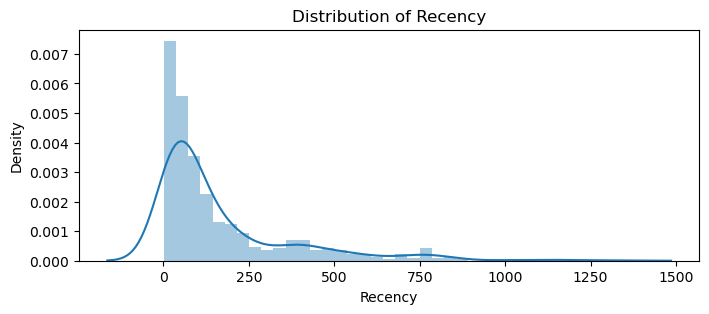

C:\Users\DELL\AppData\Local\Temp\ipykernel_14040\2840722761.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[col])


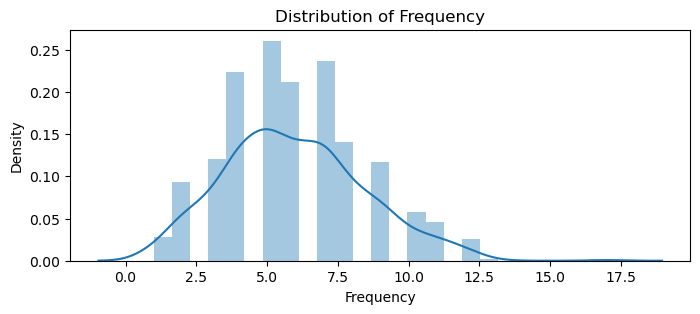

C:\Users\DELL\AppData\Local\Temp\ipykernel_14040\2840722761.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM[col])


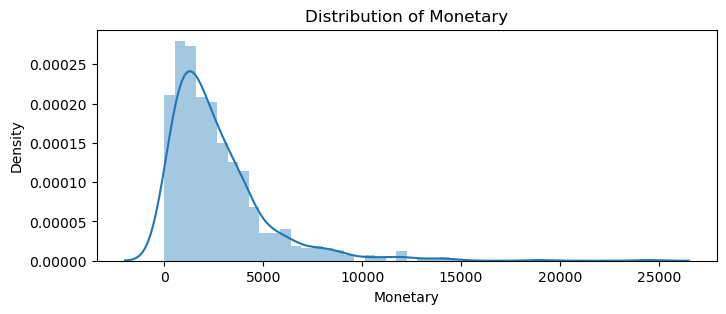

In [34]:
columns = ['Recency','Frequency','Monetary']

for col in columns:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.distplot(RFM[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

In [35]:
RFM.dtypes

Customer ID     object
Recency          int64
Frequency        int64
Monetary       float64
R                int64
F                int64
M                int64
RFM Score        int64
dtype: object

In [36]:
df = pd.read_excel(r"C:\Users\DELL\Downloads\DAC\Python\Project Final\Dataset.xlsx",sheet_name="Segmentation")
df

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."
5,Need Attention,"535, 534, 443, 434, 343, 334, 325, 324"
6,About To Sleep,"331, 321, 312, 221, 213, 231, 241, 251"
7,At Risk,"255, 254, 245, 244, 253, 252, 243, 242, 235, 2..."
8,Cannot Lose Them,"155, 154, 144, 214,215,115, 114, 113"
9,Hibernating customers,"332, 322, 233, 232, 223, 222, 132, 123, 122, 2..."


In [37]:
df['RFM Score'] = df['RFM Score'].str.split(',')
df

,Segment,RFM Score
0,Champions,"[555, 554, 544, 545, 454, 455, 445]"
1,Loyal,"[543, 444, 435, 355, 354, 345, 344, 335]"
2,Potential Loyalist,"[553, 551, 552, 541, 542, 533, 532, 531..."
3,New Customers,"[512, 511, 422, 421, 412, 411, 311]"
4,Promising,"[525, 524, 523, 522, 521, 515, 514, 513..."
5,Need Attention,"[535, 534, 443, 434, 343, 334, 325, 324]"
6,About To Sleep,"[331, 321, 312, 221, 213, 231, 241, 251]"
7,At Risk,"[255, 254, 245, 244, 253, 252, 243, 242..."
8,Cannot Lose Them,"[155, 154, 144, 214, 215, 115, 114, 113]"
9,Hibernating customers,"[332, 322, 233, 232, 223, 222, 132, 123..."


In [38]:
newdf = df.explode('RFM Score')
newdf['RFM Score'] = newdf['RFM Score'].astype(int).apply(np.int64)
newdf.reset_index(drop=True)

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
...,...,...
120,Lost customers,112
121,Lost customers,121
122,Lost customers,131
123,Lost customers,141


In [39]:
table = pd.merge(RFM, newdf, on="RFM Score", how="left")
table

,Customer ID,Recency,Frequency,Monetary,R,F,M,RFM Score,Segment
0,AA-10315,185,5,5563.560,2,2,5,225,At Risk
1,AA-10375,20,9,1056.390,5,5,2,552,Potential Loyalist
2,AA-10480,260,4,1790.512,2,1,3,213,About To Sleep
3,AA-10645,483,5,5073.975,1,2,5,125,At Risk
4,AB-10015,416,3,886.156,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
786,XP-21865,83,9,2110.726,3,5,3,353,Potential Loyalist
787,YC-21895,5,4,5438.650,5,1,5,515,Promising
788,YS-21880,10,8,6720.444,5,4,5,545,Champions
789,ZC-21910,55,12,7892.998,4,5,5,455,Champions


In [40]:
frame = table.groupby('Segment').agg({'Customer ID':'count',
                                      'Recency':'mean',
                                      'Frequency':'mean',
                                      'Monetary':'sum'}).reset_index()
frame.columns = ['Segment','Total Customer','AVG Recency','AVG Frequency','Total Monetary']
frame = frame.sort_values('Total Customer',ascending=False)
frame

,Segment,Total Customer,AVG Recency,AVG Frequency,Total Monetary
9,Potential Loyalist,113,45.185841,7.079646,190944.9303
1,At Risk,96,259.041667,7.260417,385996.8861
4,Hibernating customers,90,190.044444,4.733333,109960.2510
5,Lost customers,83,557.963855,2.975904,54264.2255
7,Need Attention,72,50.138889,6.527778,259412.3922
3,Champions,71,28.521127,9.830986,382096.5868
10,Promising,63,35.253968,4.507937,224803.8955
6,Loyal,62,60.725806,8.161290,270680.2154
8,New Customers,61,41.475410,3.393443,40997.1410
0,About To Sleep,44,135.204545,4.750000,47310.1172


In [41]:
frame['C %'] = frame['Total Customer'] * 100 / frame['Total Customer'].sum()
frame['R %'] = frame['AVG Recency'] * 100 / frame['AVG Recency'].sum()
frame['F %'] = frame['AVG Frequency'] * 100 / frame['AVG Frequency'].sum()
frame['M %'] = frame['Total Monetary'] * 100 / frame['Total Monetary'].sum()
frame

,Segment,Total Customer,AVG Recency,AVG Frequency,Total Monetary,C %,R %,F %,M %
9,Potential Loyalist,113,45.185841,7.079646,190944.9303,14.285714,2.378098,11.076627,9.020893
1,At Risk,96,259.041667,7.260417,385996.8861,12.136536,13.633174,11.359456,18.235816
4,Hibernating customers,90,190.044444,4.733333,109960.2510,11.378003,10.001901,7.405648,5.194899
5,Lost customers,83,557.963855,2.975904,54264.2255,10.493047,29.365231,4.656020,2.563628
7,Need Attention,72,50.138889,6.527778,259412.3922,9.102402,2.638773,10.213189,12.255530
3,Champions,71,28.521127,9.830986,382096.5868,8.975980,1.501046,15.381301,18.051552
10,Promising,63,35.253968,4.507937,224803.8955,7.964602,1.855391,7.052999,10.620506
6,Loyal,62,60.725806,8.161290,270680.2154,7.838180,3.195955,12.768940,12.787861
8,New Customers,61,41.475410,3.393443,40997.1410,7.711757,2.182821,5.309291,1.936845
0,About To Sleep,44,135.204545,4.750000,47310.1172,5.562579,7.115717,7.431725,2.235092


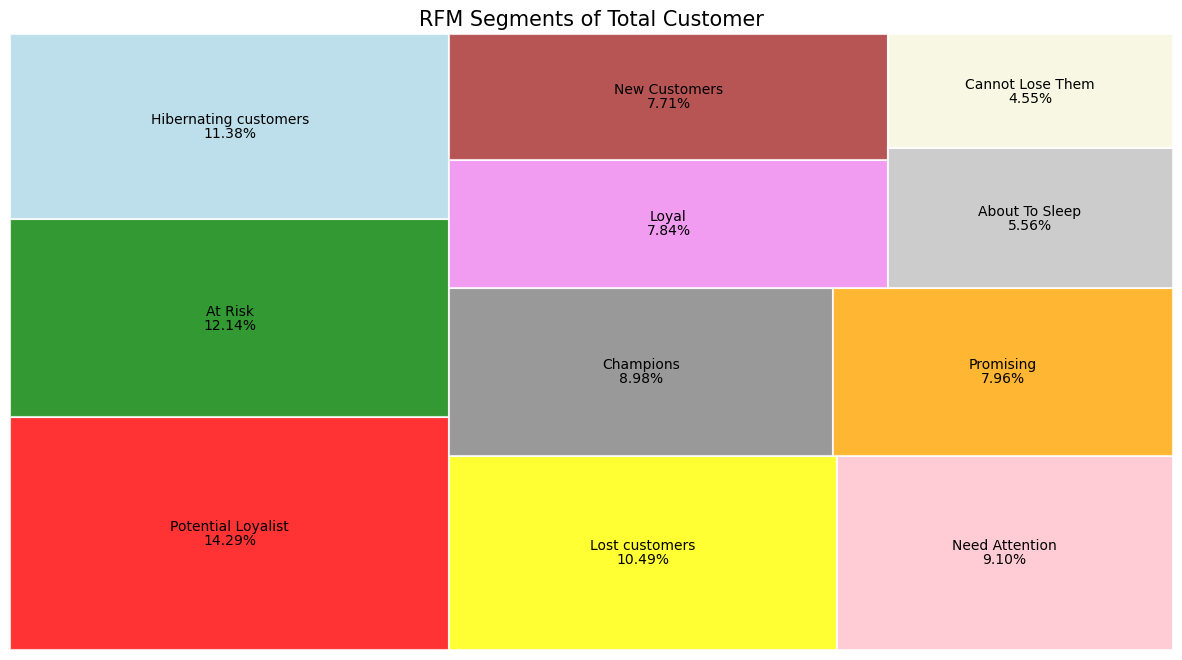

In [42]:
fig, ax = plt.subplots(1, figsize=(15,8))
colors = ['red','green','lightblue','yellow','pink','gray','orange','violet','brown','silver','beige']

squarify.plot(sizes = frame['C %'],
              label = frame['Segment'],
              value = [f'{x:.2f}%' for x in frame['C %']], 
              alpha = 0.8, color = colors,
              bar_kwargs = dict(linewidth=1.5,edgecolor='white'))

plt.title('RFM Segments of Total Customer', fontsize = 15)
plt.axis('off')
plt.show()

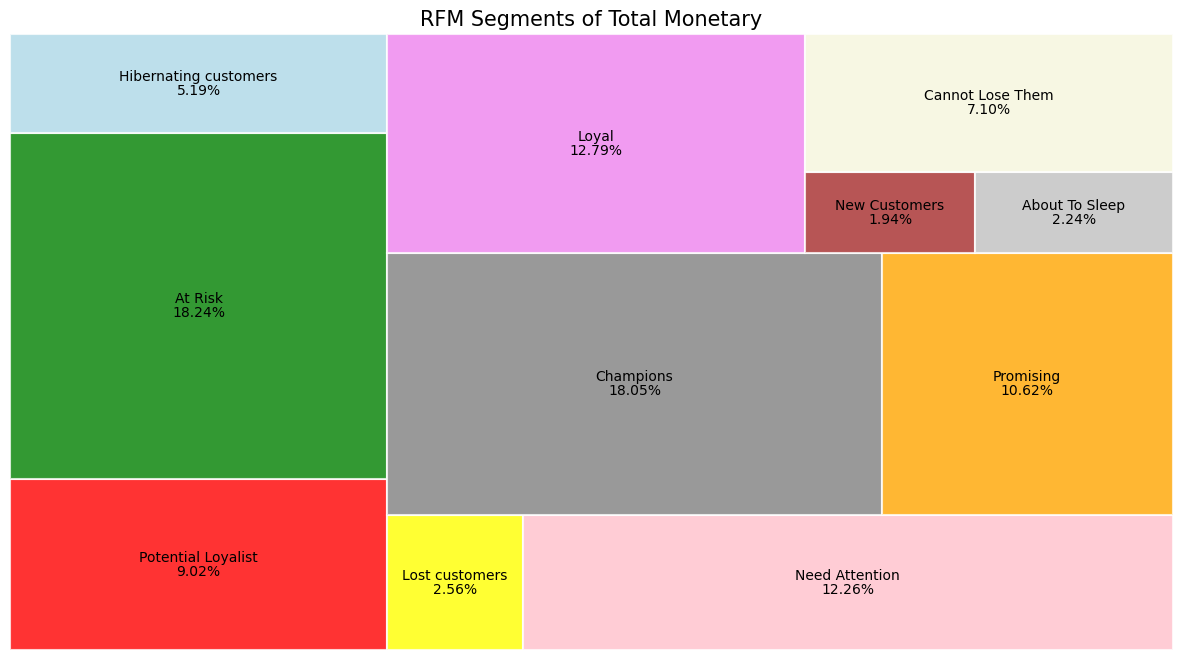

In [43]:
fig, ax = plt.subplots(1, figsize=(15,8))
colors = ['red','green','lightblue','yellow','pink','gray','orange','violet','brown','silver','beige']

squarify.plot(sizes = frame['M %'],
              label = frame['Segment'],
              value = [f'{x:.2f}%' for x in frame['M %']], 
              alpha = 0.8, color = colors,
              bar_kwargs = dict(linewidth=1.5,edgecolor='white'))

plt.title('RFM Segments of Total Monetary', fontsize = 15)
plt.axis('off')
plt.show()

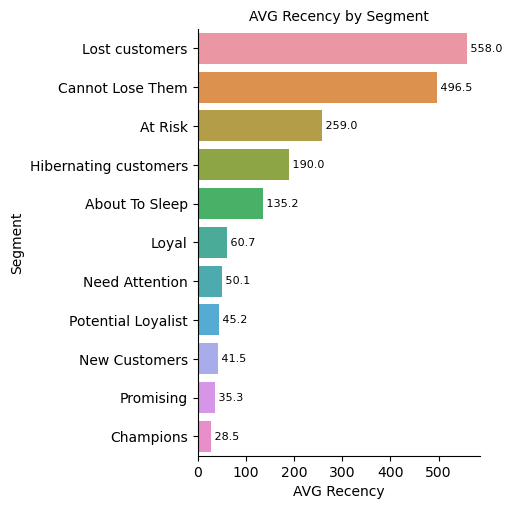

In [44]:
frame = frame.sort_values('AVG Recency', ascending = False)
g = sns.catplot(x='AVG Recency',
                y='Segment',
                data=frame,
                kind='bar')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f' {x:.1f}' for x in frame['AVG Recency']]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize = 8)

plt.title('AVG Recency by Segment', fontsize = 10)
plt.show()

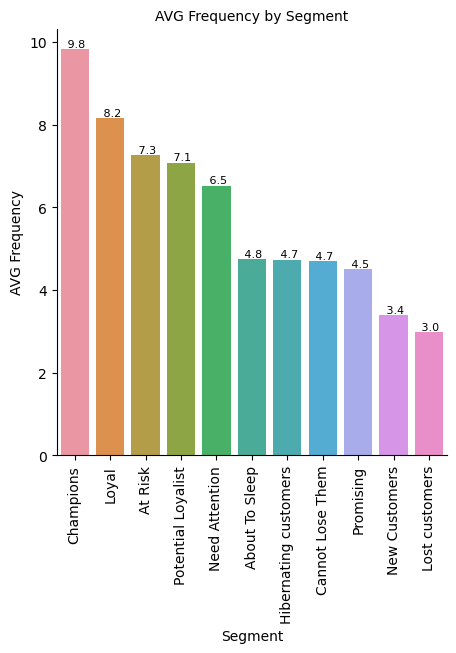

In [45]:
frame = frame.sort_values('AVG Frequency', ascending = False)
g = sns.catplot(x='Segment',
                y='AVG Frequency',
                data=frame,
                kind='bar')
ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f' {x:.1f}' for x in frame['AVG Frequency']]
    ax.bar_label(c, labels=labels, label_type='edge',fontsize = 8)

plt.title('AVG Frequency by Segment', fontsize = 10)
plt.xticks(rotation=90)
plt.show()

In [46]:
table2 = pd.merge(new,table,on='Customer ID',how='left')

In [47]:
table2['Delivery Day'] = table2['Ship Date'] - table2['Order Date']
table2 = table2[['Segment','Ship Mode','Channel','Sales','Delivery Day']]
table2

,Segment,Ship Mode,Channel,Sales,Delivery Day
0,Loyal,Standard Class,Home Office,209.300,6 days
1,Need Attention,Standard Class,Consumer,323.136,4 days
2,Need Attention,Standard Class,Consumer,90.930,4 days
3,Need Attention,Standard Class,Consumer,52.776,4 days
4,Promising,Standard Class,Consumer,3.024,4 days
...,...,...,...,...,...
9189,Potential Loyalist,Standard Class,Consumer,19.536,7 days
9190,Lost customers,Standard Class,Home Office,11.784,4 days
9191,Lost customers,Standard Class,Home Office,272.736,4 days
9192,Lost customers,Standard Class,Home Office,3.540,4 days


In [48]:
pro = table2.groupby('Ship Mode')['Delivery Day'].mean().reset_index()
pro['Delivery Day'] = pro['Delivery Day'].dt.days
pro

,Ship Mode,Delivery Day
0,First Class,2
1,Same Day,0
2,Second Class,3
3,Standard Class,5


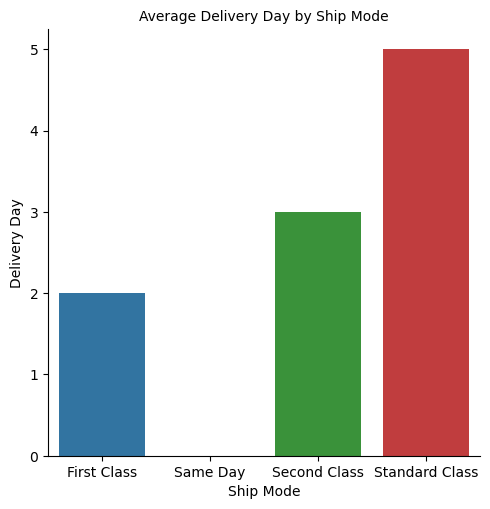

In [49]:
sns.catplot(x='Ship Mode',
            y='Delivery Day',
            data=pro,
            kind='bar')
plt.title('Average Delivery Day by Ship Mode',fontsize=10)
plt.show()

In [50]:
pro1 = table2.groupby('Channel').sum().reset_index()
pro1

C:\Users\DELL\AppData\Local\Temp\ipykernel_14040\2413441406.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pro1 = table2.groupby('Channel').sum().reset_index()


,Channel,Sales
0,Consumer,1.056016e+06
1,Corporate,6.542343e+05
2,Home Office,4.064462e+05


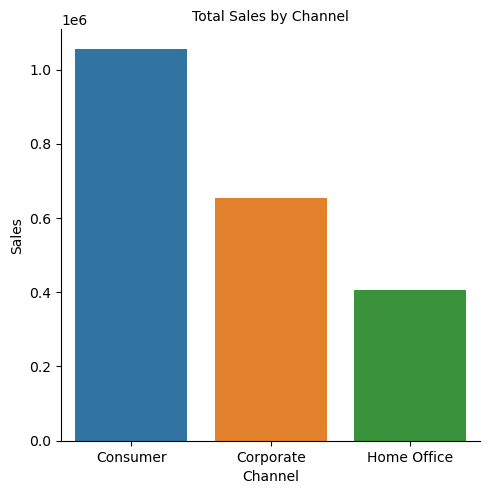

In [51]:
sns.catplot(x='Channel',
            y='Sales',
            data=pro1,
            kind='bar')
plt.title('Total Sales by Channel',fontsize = 10)
plt.show()